RMS: 1.760668431566003e-07  [A**2] y Error promedio: -5.949332607453453e-05  [A], además los valores que minimizan estos errores son I_{0}= 9.13880513248877e-12  [A] y T= -436.571  [K]


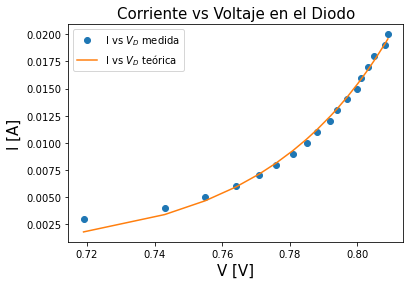

In [6]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import xlwings as xw
wb=xw.Book('TAREA.xlsx')
c=wb.sheets[0]



#Parte (2): podemos calcular el rms promedio como sigma**2 + mu**2


#Corriente vs Voltaje en el diodo
corriente = c.range('A2','A21').value #esta en miliamperes,
                                                #multiplicamos por eso por 10**(-3)
voltaje_en_el_diodo = c.range('B2','B21').value

#definimos la carga del electron y la constante de Boltzmann
q=-1.6*(10**(-19))#en Coulomb
K=1.38*(10**(-23))#en Joules/Kelvin
def funcion_min(V_d, I_0, Temp):
    #esta es la función a minimizar con curvefit, para encontrar los parámetros I_0
    #y T óptimos, que minimizan el error cuadrático medio.
    #usamos el modelo recomendado en clases, donde T es la temperatura en Kelvin,
    # V_d es el voltaje que corre por el díodo, e I_corriente es la corriente
    # obtenida experimentalmente
    return I_0*((np.e**((q*V_d)/(K*Temp)))-1)
    
V_d = np.array(voltaje_en_el_diodo)
I = (10**(-3))*np.array(corriente)
guess = np.array([1, -400])
parametros, covarianza = curve_fit(funcion_min, V_d[2:], I[2:], guess)
I_0_opt = parametros[0]
T_opt = parametros[1]

#la corriente que minimiza el error cuadrático medio es:
#es de notar que aquí se obviaron 2 pares de datos, por ser 
#errores aleatorios de los dispositivos utilizados y que por
#lo tanto son inevitables por su propia naturaleza
I_nueva_fit = funcion_min(V_d[2:], I_0_opt, T_opt)

#Ahora bien, el rms es sigma**2 + promedio**2:
resta = I_nueva_fit - I[2:]
RMS = (np.std(resta))**2 + (np.mean(resta))**2
#y el error promedio es:
ERR_prom = (sum(resta))/len(resta) 
print("RMS:",RMS," [A**2] y Error promedio:",ERR_prom, " [A], además",
      "los valores que minimizan estos errores son I_{0}=",I_0_opt," [A] y T=",round(T_opt,3)," [K]")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(V_d[2:], I[2:],'o' , label='I vs $V_{D}$ medida')
ax.plot(V_d[2:], I_nueva_fit, label='I vs $V_{D}$ teórica')
plt.title('Corriente vs Voltaje en el Diodo',fontsize = 15)
plt.ylabel('I [A]',fontsize = 15)
plt.xlabel('V [V]',fontsize = 15)
ax.legend()
plt.show()

 



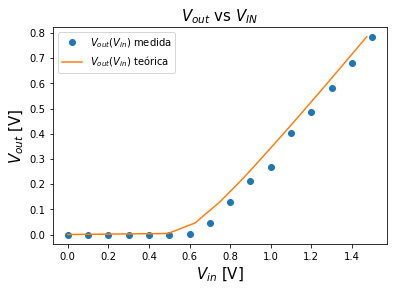

In [7]:
#Parte (3): queremos una expresion que relacione v_in con v_out
#primero definimos la resistencia, y usamos valores ya optimizado
from scipy import optimize
v_in = c.range('C24','C39').value
v_out = c.range('D24','D39').value

#arreglo = np.zeros(len(v_in)), en particular, nosotros no usaremos ningún metodo numerico,
#simplemente nos aprovechamos del hecho de que V_in depende de V_out.
R = 10**(3) #Ohms
def no_analitica(V_out):
    return ((K*T_opt)/q)*np.log((V_out/(R*I_0_opt)+1)) + V_out
v_in_fit = np.array(no_analitica(v_out))


fig = plt.figure()
ay = fig.add_subplot(111)
ay.plot(v_in, v_out,'o' , label='$V_{out}(V_{in})$ medida')
ay.plot(v_in_fit, v_out,   label='$V_{out}(V_{in})$ teórica')
plt.title('$V_{out}$ vs $V_{IN}$',fontsize = 15)
plt.ylabel('$V_{out}$ [V]',fontsize = 15)
plt.xlabel('$V_{in}$ [V]',fontsize = 15)
ay.legend()
plt.show()




la maxima curvatura (teórica) es: Curv =  3.934435640140228 mientras que el valor de V_in (teórico) al cual se maximiza la curvatura es: V_in =  0.5662548230186913
el V_in y la curvatura maximizada medidas son,respectivamente:  0.6270658773561105  y  2.958746959911843


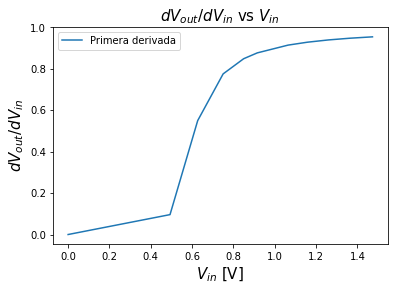

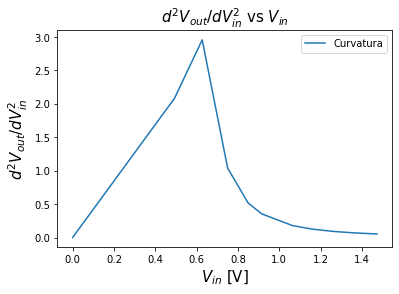

In [8]:
#Parte 4
#queremos además conocer la curvatura de Vout(vin), que se calcula como la derivada segunda.
V_in_max_curv = (K*T_opt)/(2*q) - R*I_0_opt + ((K*T_opt)/(q))*np.log((K*T_opt)/(2*q*R*I_0_opt))
print()
#mientras que la curvatura maxima alcanzada a tal punto es:
max_curv = (4*q)/(27*K*T_opt)
print('la maxima curvatura (teórica) es: Curv = ', max_curv, 'mientras que '
      'el valor de V_in (teórico) al cual se maximiza la curvatura es: V_in = ',
      V_in_max_curv)
#Además, queremos obtener la curva de derivadas primera y segunda:

der_1_v_in_fit = (q*(v_out+R*I_0_opt))/(K*T_opt+q*(v_out+R*I_0_opt))
der_2_v_in_fit = ((q**2)*K*T_opt*(v_out+R*I_0_opt))/((K*T_opt+q*(v_out+R*I_0_opt))**3)

#ahora queremos obtener empíricamente cuanto vale el maximo v_in y la curvatura que es maximizada por éste:
for i in range(1, len(der_2_v_in_fit)):
    if der_2_v_in_fit[i]==max(der_2_v_in_fit):
        print('el V_in y la curvatura maximizada medidas son,'
              'respectivamente: ', v_in_fit[i],' y ',der_2_v_in_fit[i])

#si nos fijamos de ambas curvas, es claro que con más puntos serían mas curvas.
fig2 = plt.figure()
a1 = fig2.add_subplot(111)
a1.plot(v_in_fit, der_1_v_in_fit,   label='Primera derivada')
plt.title('$dV_{out}/dV_{in}$ vs $V_{in}$',fontsize = 15)
plt.ylabel('$dV_{out}/dV_{in}$',fontsize = 15)
plt.xlabel('$V_{in}$ [V]',fontsize = 15)
a1.legend()
plt.show()

fig3 = plt.figure()
a2 = fig3.add_subplot(111)
a2.plot(v_in_fit, der_2_v_in_fit,   label='Curvatura')
plt.title('$d^2 V_{out}/dV_{in}^{2}$ vs $V_{in}$',fontsize = 15)
plt.ylabel('$d^2 V_{out}/dV_{in}^{2}$',fontsize = 15)
plt.xlabel('$V_{in}$ [V]',fontsize = 15)
a2.legend()
plt.show()

el V_DC_Offset y la Potencia del segundo armónico maximizada medidos son,respectivamente:  1100.0  [mV] y  0.251188643150958


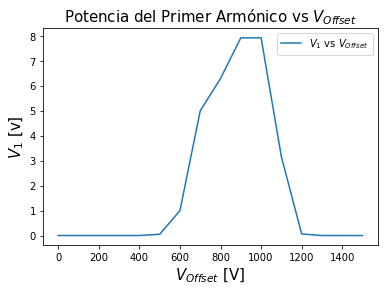

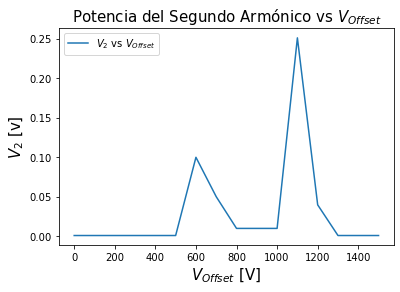

In [9]:
#Parte 5: ahora buscamos ver el punto de V DC offset al cual se maximiza la
#potencia del segundo armónico.
#potencia del primer armonico
voltaje_OFFSET = c.range('G2','G17').value
Potencia_primer_arm = c.range('K2','K17').value

#potencia del segundo armonico
voltaje_OFFSET = c.range('G2','G17').value
Potencia_segundo_arm = c.range('J2','J17').value

V_0 = 0
for i in range(1, len(Potencia_segundo_arm)):
    if Potencia_segundo_arm[i]==max(Potencia_segundo_arm):
        V_0 = voltaje_OFFSET[i]
        print('el V_DC_Offset y la Potencia del segundo armónico maximizada medidos '
              'son,respectivamente: ', voltaje_OFFSET[i],' [mV] y ', Potencia_segundo_arm[i])

fig4 = plt.figure()
a0 = fig4.add_subplot(111)
a0.plot(voltaje_OFFSET, Potencia_primer_arm,   label='$V_{1}$ vs $V_{Offset}$')
plt.title('Potencia del Primer Armónico vs $V_{Offset}$',fontsize = 15)
plt.ylabel('$V_{1}$ [v]',fontsize = 15)
plt.xlabel('$V_{Offset}$ [V]',fontsize = 15)
a0.legend()
plt.show()

fig5 = plt.figure()
a7 = fig5.add_subplot(111)
a7.plot(voltaje_OFFSET, Potencia_segundo_arm, label='$V_{2}$ vs $V_{Offset}$')
plt.title('Potencia del Segundo Armónico vs $V_{Offset}$',fontsize = 15)
plt.ylabel('$V_{2}$ [v]',fontsize = 15)
plt.xlabel('$V_{Offset}$ [V]',fontsize = 15)
a7.legend()
plt.show()

los coeficientes de los primeros 3 armónicos son:  -2198.5859735143026 -5.188583405817125e-05 -1.8383510096354056e-10


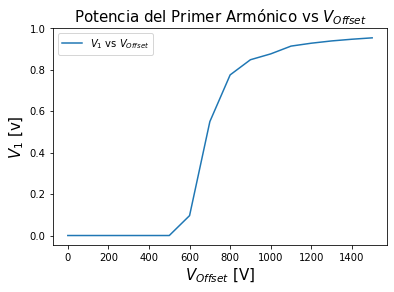

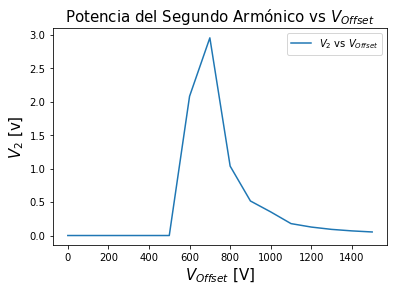

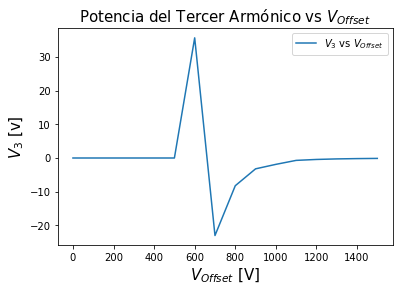

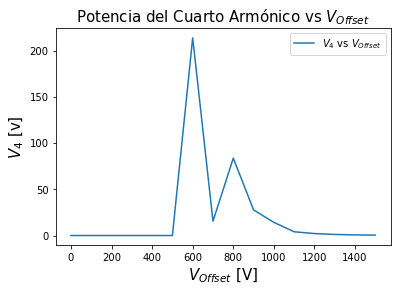

In [28]:
#Parte 7
import matplotlib.pyplot as plt
#queremos ver el valor de Vout en funcion de vin, el cual depende a su vez del tiempo teoricamente
V0 = v_out
dr_1 = (q*(V0+R*I_0_opt))/(K*T_opt+q*(V0+R*I_0_opt))
dr_2 = ((q**2)*K*T_opt*(V0+R*I_0_opt))/((K*T_opt+q*(V0+R*I_0_opt))**3)
dr_3 = ((q**3)*K*T_opt*(K*T_opt-2*q*(V0+R*I_0_opt))*(V0+R*I_0_opt))/((K*T_opt+q*(V0+R*I_0_opt))**5)
dr_4 = ((q**4)*K*T_opt*(V0+R*I_0_opt)*((K*T_opt)**2 - 8*K*T_opt*q*(V0+R*I_0_opt) + 6*(q**2)*(V0+R*I_0_opt)**2))/((K*T_opt+q*(V0+R*I_0_opt))**7)

V1 = V_0
dr_10 = (q*(V1+R*I_0_opt))/(K*T_opt+q*(V1+R*I_0_opt))
dr_20 = ((q**2)*K*T_opt*(V1+R*I_0_opt))/((K*T_opt+q*(V1+R*I_0_opt))**3)
dr_30 = ((q**3)*K*T_opt*(K*T_opt-2*q*(V1+R*I_0_opt))*(V1+R*I_0_opt))/((K*T_opt+q*(V1+R*I_0_opt))**5)
dr_40 = ((q**4)*K*T_opt*(V1+R*I_0_opt)*((K*T_opt)**2 - 8*K*T_opt*q*(V1+R*I_0_opt) + 6*(q**2)*(V1+R*I_0_opt)**2))/((K*T_opt+q*(V1+R*I_0_opt))**7)

#calculamos los coeficientes en sí: B,C,D que son los de los primeros 3 armónicos:
B = dr_10 - 2*V1*dr_10 + dr_20*(2*V1**2-3*V1+1)/2 - dr_30*(V1**3) + dr_40*(8*V1**4+24*V1**2+3)/8
C = dr_20*(1-3*V1)/2 - dr_40*(3*V1**2+2)
D = dr_30/4 - V1*dr_40
print("los coeficientes de los primeros 3 armónicos son: ",B,C,D)
#Ahora graficamos la potencia de las 4 derivadas.
fig9 = plt.figure()
a8 = fig9.add_subplot(111)
a8.plot(voltaje_OFFSET, dr_1, label='$V_{1}$ vs $V_{Offset}$')
plt.title('Potencia del Primer Armónico vs $V_{Offset}$',fontsize = 15)
plt.ylabel('$V_{1}$ [v]',fontsize = 15)
plt.xlabel('$V_{Offset}$ [V]',fontsize = 15)
a8.legend()
plt.show()

fig10 = plt.figure()
a9 = fig10.add_subplot(111)
a9.plot(voltaje_OFFSET, dr_2, label='$V_{2}$ vs $V_{Offset}$')
plt.title('Potencia del Segundo Armónico vs $V_{Offset}$',fontsize = 15)
plt.ylabel('$V_{2}$ [v]',fontsize = 15)
plt.xlabel('$V_{Offset}$ [V]',fontsize = 15)
a9.legend()
plt.show()

fig11 = plt.figure()
a11 = fig11.add_subplot(111)
a11.plot(voltaje_OFFSET, dr_3, label='$V_{3}$ vs $V_{Offset}$')
plt.title('Potencia del Tercer Armónico vs $V_{Offset}$',fontsize = 15)
plt.ylabel('$V_{3}$ [v]',fontsize = 15)
plt.xlabel('$V_{Offset}$ [V]',fontsize = 15)
a11.legend()
plt.show()

fig12 = plt.figure()
a12 = fig12.add_subplot(111)
a12.plot(voltaje_OFFSET, dr_4, label='$V_{4}$ vs $V_{Offset}$')
plt.title('Potencia del Cuarto Armónico vs $V_{Offset}$',fontsize = 15)
plt.ylabel('$V_{4}$ [v]',fontsize = 15)
plt.xlabel('$V_{Offset}$ [V]',fontsize = 15)
a12.legend()
plt.show()